# Principal compoenet analysis 실습

대부분의 머신러닝을 모듈에 포함하고, 이에 대한 예제와 정보가 담겨있는 웹사이트 참고: https://scikit-learn.org

# 1. 데이터 전처리 및 데이터 파악

- scikit-lean 패키지에서 데이터와 PCA 로드.

In [1]:
from sklearn import datasets
from sklearn.decomposition import PCA

- 자료 처리에 도움을 줄 pandas, numpy와 시각화를 위한 pyplot, seaborn 로드.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- iris 데이터를 불러오고, 구조를 살핌.

In [3]:
iris = datasets.load_iris()
dir(iris) # 포함하고 있는 것들을 확인 가능

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

- 설명의 편의를 위하여, 독립변수 중 처음 2개만을 사용.

In [4]:
X = iris.data[:,:2] # 처음 2개만 사용
y = iris.target

In [5]:
print(X.shape)
feature_names = [iris.feature_names[0], iris.feature_names[2]]
df_X = pd.DataFrame(X, columns=feature_names)
df_X.head()

(150, 2)


,sepal length (cm),petal length (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [6]:
print(y.shape)
df_y = pd.DataFrame(y, columns=['target'])
df_y.head()

(150,)


,target
0,0
1,0
2,0
3,0
4,0


- 결측치 여부를 파악.

In [7]:
df_X.isnull().sum()

sepal length (cm)    0
petal length (cm)    0
dtype: int64

In [8]:
df_y.isnull().sum()

target    0
dtype: int64

In [9]:
print(set(y))
iris.target_names

{0, 1, 2}


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

- 종속 변수 (출력변수, 반응변수)의 분포를 살핌.

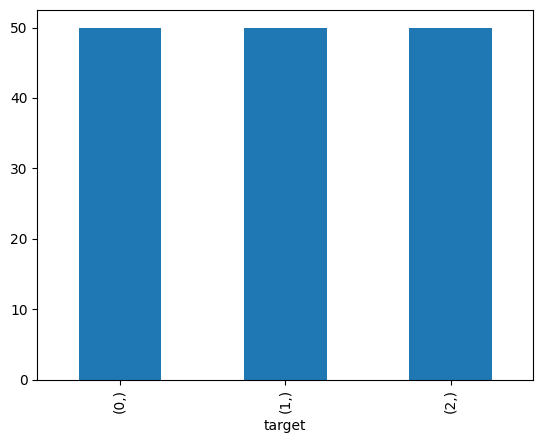

In [22]:
df_y.value_counts().plot(kind='bar')
plt.show() #50개씩 150개 (한개로 치우쳐져있으면 치우쳐져있는 것 포기)

- 독립 변수 (속성, 입력변수, 설명변수)의 분포를 살핌.

In [38]:
X.shape

(150, 2)

In [27]:
X[:,0], X[:,1]

(array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
        4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
        5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
        5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
        6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
        6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
        6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
        6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
        6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
        7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
        7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
        6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9]),
 array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
        3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
      

<ipython-input-29-191f2302aada>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[:,i])


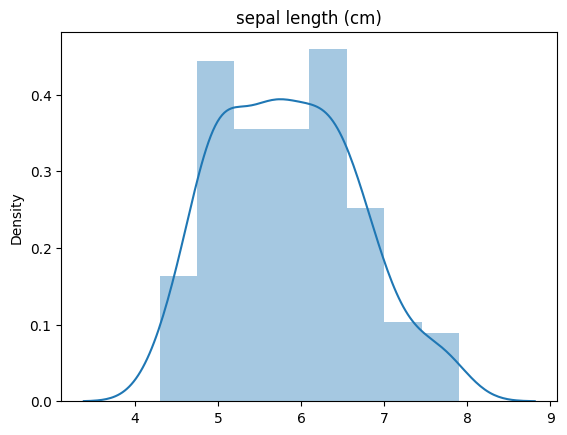

<ipython-input-29-191f2302aada>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[:,i])


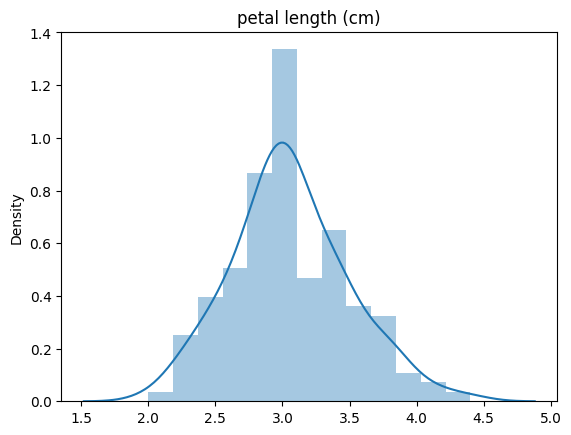

In [29]:
for i in range(X.shape[1]):
    sns.distplot(X[:,i])
    plt.title(feature_names[i])
    plt.show()

# 2. PCA 함수 활용 및 아웃풋 의미파악

- PCA 함수를 활용하여 PC를 얻어냄. 아래의 경우 PC 2개를 뽑아냄.

In [30]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

- 아래와 같이 PC score를 얻어냄. 아래의 PC score를 이용하여, 회귀분석에 활용할 수 있음.

In [31]:
pca.components_

array([[ 0.99640834, -0.08467831],
       [ 0.08467831,  0.99640834]])

In [33]:
pca.explained_variance_

array([0.6892997 , 0.18637323])

In [34]:
PCscore = pca.transform(X)
PCscore[0:5]

array([[-0.7781478 ,  0.37813255],
       [-0.93509031, -0.13700728],
       [-1.15130764,  0.04533873],
       [-1.24248065, -0.06276994],
       [-0.88625646,  0.46930556]])

In [35]:
eigens_v = pca.components_.T # transpose 해주어야 함
eigens_v

array([[ 0.99640834,  0.08467831],
       [-0.08467831,  0.99640834]])

In [39]:
mX=np.matrix(X)
for i in range(X.shape[1]):
    mX[:,i]=mX[:,i]-np.mean(X[:,i])
dfmX=pd.DataFrame(mX)

In [40]:
# 참고용 PCscore 계산법 (위와 같음)
 (mX * eigens_v)[:5]

matrix([[-0.7781478 ,  0.37813255],
        [-0.93509031, -0.13700728],
        [-1.15130764,  0.04533873],
        [-1.24248065, -0.06276994],
        [-0.88625646,  0.46930556]])

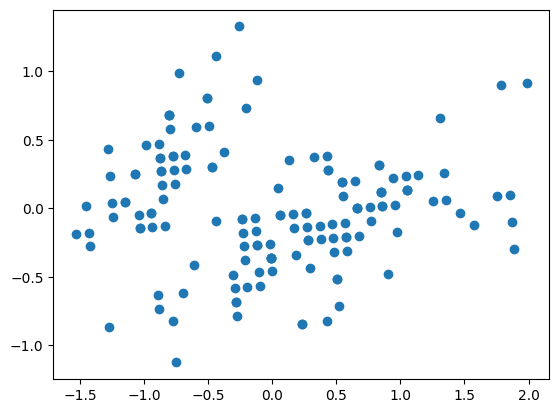

In [41]:
# 축이 바뀐 PCscore
plt.scatter(PCscore[:,0],PCscore[:,1])
plt.show()

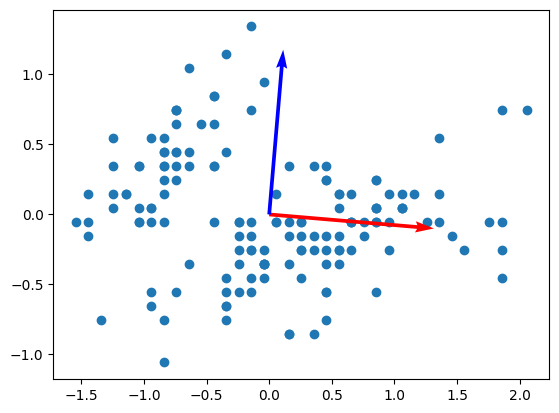

In [43]:
# 원래 데이터
plt.scatter(dfmX[0],dfmX[1])
origin = [0, 0], [0, 0] # origin point
plt.quiver(*origin, eigens_v[0, :], eigens_v[1, :], color=['r', 'b'], scale=3)
plt.show()

# 3. PC를 활용한 회귀분석

- 이번에는 모든 독립변수를 활용하여 PC를 뽑아냄.

In [44]:
X2 = iris.data
pca2 = PCA(n_components=4)
pca2.fit(X2)

PCA(n_components=4)

In [45]:
pca2.explained_variance_
#eigenvalue 첫번째가 두번째보다 20배, 셋째보다 60배 중요 -> 첫번째가 매우 중요
#Dimension Reduction이 가능할 것 같다. 두개 or 하나만을 가지고 가능할듯함

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [46]:
PCs=pca2.transform(X2)[:,0:2]

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

- 모델의 복잡성으로 인하여 기존 자료를 이용한 분석은 수렴하지 않는 모습.

In [48]:
# multiple이기 때문에 multi_class="multinomial" 아니면 0,1로만 나옴
# solver 해를 구하는 것 'sag'
# 피팅 안됨
clf = LogisticRegression(solver='sag', multi_class="multinomial").fit(X2, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [50]:
# 2개로 줄인 PCs로 X 바꿈 - 피팅 됨
clf2 = LogisticRegression(solver='sag', multi_class="multinomial").fit(PCs, y)

- PC 2개 만을 뽑아내여 분석한 경우 모델이 수렴.

In [51]:
clf2.predict(PCs)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [53]:
confusion_matrix(y, clf2.predict(PCs)) # 두번째 세번째 잘 설명 못함

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  2, 48]])

- 임의로 변수 2개 만을 뽑아내여 분석한 경우 모델의 퍼포먼스가 하락함.

In [54]:
clf = LogisticRegression(solver='sag', max_iter=1000, random_state=0,
                             multi_class="multinomial").fit(X2[:,0:2], y) #0:2 (첫째, 둘째)

In [55]:
confusion_matrix(y, clf.predict(X2[:,0:2])) # 두번째 세번째 잘 설명 못함

array([[49,  1,  0],
       [ 0, 37, 13],
       [ 0, 14, 36]])

- 위와 같이, 차원축소를 통하여 모델의 복잡성을 줄이는 동시에 최대한 많은 정보를 활용하여 분석할 수 있음.